In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
# Load Control Points and Data 
points=pd.read_excel(r'/home/2671264p/GeoFun_2024/week_7/2024_madagasscar_project_data.xlsx')
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y
0,A,0.0,30.0,419,163
1,B,0.0,60.0,586,163
2,C,-30.0,60.0,586,340
3,D,-30.0,30.0,419,340
4,C1,NaN,NaN,525,233
5,C2,NaN,NaN,532,252
6,C3,NaN,NaN,528,253
7,C4,NaN,NaN,528,259
8,C5,NaN,NaN,517,294
9,C6,NaN,NaN,513,309


In [3]:
# Define Earth Radius Constant 
R = 6378000

In [4]:
# Convert Latitude/Longitude to Radians
points['radians_x'] = np.radians(points['Lat_deg_N'])
points['Lat(radians_N)']=np.radians(points['Lat_deg_N'])
points['Long(radians_E)']=np.radians(points['Long_deg_E'])
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599
4,C1,NaN,NaN,525,233,NaN,NaN,NaN
5,C2,NaN,NaN,532,252,NaN,NaN,NaN
6,C3,NaN,NaN,528,253,NaN,NaN,NaN
7,C4,NaN,NaN,528,259,NaN,NaN,NaN
8,C5,NaN,NaN,517,294,NaN,NaN,NaN
9,C6,NaN,NaN,513,309,NaN,NaN,NaN


In [5]:
# Calculate Mercator Projection Coordinates
points['tan_lat']=np.tan(((np.pi/4)+(points['Lat(radians_N)']/2)))
points['Easting_Mer(x_m)']= earth_radius_m = R * points['Long(radians_E)']
points['Northing_Mer(y_m)']= earth_radius_m = R * np.log(points['tan_lat'])
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E),tan_lat,Easting_Mer(x_m),Northing_Mer(y_m)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599,1.00000,3.339513e+06,-7.081002e-10
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198,1.00000,6.679026e+06,-7.081002e-10
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198,0.57735,6.679026e+06,-3.503475e+06
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599,0.57735,3.339513e+06,-3.503475e+06
4,C1,NaN,NaN,525,233,NaN,NaN,NaN,NaN,NaN,NaN
5,C2,NaN,NaN,532,252,NaN,NaN,NaN,NaN,NaN,NaN
6,C3,NaN,NaN,528,253,NaN,NaN,NaN,NaN,NaN,NaN
7,C4,NaN,NaN,528,259,NaN,NaN,NaN,NaN,NaN,NaN
8,C5,NaN,NaN,517,294,NaN,NaN,NaN,NaN,NaN,NaN
9,C6,NaN,NaN,513,309,NaN,NaN,NaN,NaN,NaN,NaN


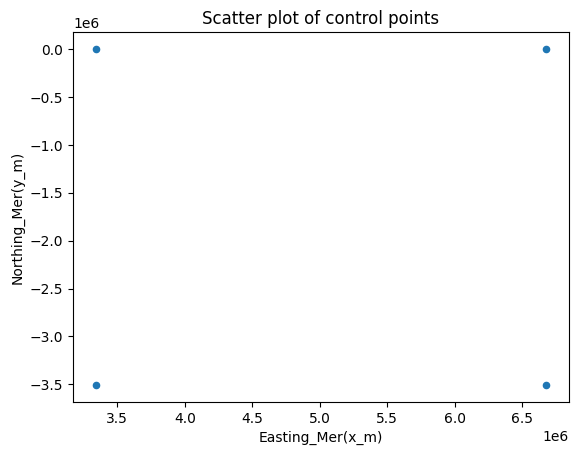

In [6]:
# Visualize Mercator Projection
sns = points.plot.scatter(x ='Easting_Mer(x_m)', y ='Northing_Mer(y_m)',title = "Scatter plot of control points");

In [7]:
# Estimate Digitizer to Mercator 2D similarity transformation constants using 4 control points and Least Squares
control_points = points[['Easting_Mer(x_m)','Northing_Mer(y_m)','pixel_x','pixel_y']].iloc[0:4,:].copy()
control_points

,Easting_Mer(x_m),Northing_Mer(y_m),pixel_x,pixel_y
0,3.339513e+06,-7.081002e-10,419,163
1,6.679026e+06,-7.081002e-10,586,163
2,6.679026e+06,-3.503475e+06,586,340
3,3.339513e+06,-3.503475e+06,419,340


In [8]:
L_OS = (pd.concat([control_points['Easting_Mer(x_m)'], control_points['Northing_Mer(y_m)']])
        .sort_index(kind='merge')
        .to_numpy())
L_OS

array([ 3.33951299e+06, -7.08100245e-10,  6.67902598e+06, -7.08100245e-10,
        6.67902598e+06, -3.50347459e+06,  3.33951299e+06, -3.50347459e+06])

In [9]:
_L_concat =pd.concat([control_points['Easting_Mer(x_m)'], control_points['Northing_Mer(y_m)']])
print(_L_concat)

0    3.339513e+06
1    6.679026e+06
2    6.679026e+06
3    3.339513e+06
0   -7.081002e-10
1   -7.081002e-10
2   -3.503475e+06
3   -3.503475e+06
dtype: float64


In [10]:
_L_sorted=_L_concat.sort_index(kind='merge')
_L_sorted

0    3.339513e+06
0   -7.081002e-10
1    6.679026e+06
1   -7.081002e-10
2    6.679026e+06
2   -3.503475e+06
3    3.339513e+06
3   -3.503475e+06
dtype: float64

In [11]:
_L_numpy = _L_sorted.to_numpy()
_L_numpy

array([ 3.33951299e+06, -7.08100245e-10,  6.67902598e+06, -7.08100245e-10,
        6.67902598e+06, -3.50347459e+06,  3.33951299e+06, -3.50347459e+06])

In [12]:
_L_numpy==L_OS

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
control_points.columns

Index(['Easting_Mer(x_m)', 'Northing_Mer(y_m)', 'pixel_x', 'pixel_y'], dtype='object')

In [14]:
#Define matrices for least squares
col1= (pd.concat([control_points['pixel_x'], -control_points['pixel_y']]).sort_index(kind='merge').to_numpy())
print(col1)

col2 =(pd.concat([-control_points['pixel_y'], control_points['pixel_x']]).sort_index(kind='merge').to_numpy())
print(col2)


col_tx = np.empty((len(col1),),float)
col_tx[::2] = 1
col_tx[1::2] = 0
print(col_tx)

col_ty = np.empty((len(col1),),float)
col_ty[::2] = 0
col_ty[1::2] = 1
print(col_ty)

A_gf=np.column_stack((col1,col2,col_tx,col_ty))
print(A_gf)

[ 419 -163  586 -163  586 -340  419 -340]
[-163  419 -163  586 -340  586 -340  419]
[1. 0. 1. 0. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 1. 0. 1.]
[[ 419. -163.    1.    0.]
 [-163.  419.    0.    1.]
 [ 586. -163.    1.    0.]
 [-163.  586.    0.    1.]
 [ 586. -340.    1.    0.]
 [-340.  586.    0.    1.]
 [ 419. -340.    1.    0.]
 [-340.  419.    0.    1.]]


In [15]:
v_vect = np.matmul(A_gf.T, L_OS)

In [16]:
AtA=np.matmul(A_gf.T, A_gf)
AtA

array([[ 1.322252e+06, -1.011030e+06,  2.010000e+03, -1.006000e+03],
       [-1.011030e+06,  1.322252e+06, -1.006000e+03,  2.010000e+03],
       [ 2.010000e+03, -1.006000e+03,  4.000000e+00,  0.000000e+00],
       [-1.006000e+03,  2.010000e+03,  0.000000e+00,  4.000000e+00]])

In [17]:
q_matrix = np.linalg.inv(AtA)
print(q_matrix)

[[ 1.68867574e-05 -3.11024877e-20 -8.48559560e-03  4.24701949e-03]
 [-6.04103842e-21  1.68867574e-05  4.24701949e-03 -8.48559560e-03]
 [-8.48559560e-03  4.24701949e-03  5.58213719e+00 -4.26825458e+00]
 [ 4.24701949e-03 -8.48559560e-03 -4.26825458e+00  5.58213719e+00]]


In [18]:
print(A_gf)

[[ 419. -163.    1.    0.]
 [-163.  419.    0.    1.]
 [ 586. -163.    1.    0.]
 [-163.  586.    0.    1.]
 [ 586. -340.    1.    0.]
 [-340.  586.    0.    1.]
 [ 419. -340.    1.    0.]
 [-340.  419.    0.    1.]]


In [19]:
X_vect = np.matmul(q_matrix, v_vect)
print(X_vect)

[ 1.98894537e+04 -4.36557457e-11 -4.98518102e+06  3.25046032e+06]


In [20]:
lin_model=np.matmul(A_gf,X_vect)
lin_model=lin_model
lin_model

array([ 3348500.09877687,     8479.36179565,  6670038.87352092,
           8479.36179565,  6670038.87352093, -3511953.95035823,
        3348500.09877688, -3511953.95035822])

In [21]:
L_OS = L_OS
L_OS

array([ 3.33951299e+06, -7.08100245e-10,  6.67902598e+06, -7.08100245e-10,
        6.67902598e+06, -3.50347459e+06,  3.33951299e+06, -3.50347459e+06])

In [22]:
#Error Calculations
residal_cp = (lin_model - L_OS).reshape(4,2)

print(residal_cp)

[[ 8987.10801092  8479.36179565]
 [-8987.10801098  8479.36179565]
 [-8987.10801097 -8479.36179562]
 [ 8987.10801093 -8479.36179562]]


In [23]:
ls_errors=(np.matmul(A_gf, X_vect) -L_OS)

ls_errors=ls_errors.reshape(4,2)
ls_errors

array([[ 8987.10801092,  8479.36179565],
       [-8987.10801098,  8479.36179565],
       [-8987.10801097, -8479.36179562],
       [ 8987.10801093, -8479.36179562]])

In [24]:
ls_errors==residal_cp

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [25]:
lin_model=lin_model.reshape(4,2)

lin_model

array([[ 3348500.09877687,     8479.36179565],
       [ 6670038.87352092,     8479.36179565],
       [ 6670038.87352093, -3511953.95035823],
       [ 3348500.09877688, -3511953.95035822]])

In [26]:
control_points['LSF easting (m)']=lin_model[:,0]
control_points['LSF northing (m)']=lin_model[:,1]

control_points['LSF residual'] =np.sqrt(( ls_errors[:,0])**2 + (ls_errors[:,1])**2)
control_points

,Easting_Mer(x_m),Northing_Mer(y_m),pixel_x,pixel_y,LSF easting (m),LSF northing (m),LSF residual
0,3.339513e+06,-7.081002e-10,419,163,3.348500e+06,8.479362e+03,12355.876612
1,6.679026e+06,-7.081002e-10,586,163,6.670039e+06,8.479362e+03,12355.876612
2,6.679026e+06,-3.503475e+06,586,340,6.670039e+06,-3.511954e+06,12355.876612
3,3.339513e+06,-3.503475e+06,419,340,3.348500e+06,-3.511954e+06,12355.876612


In [27]:
# Estimate 2D similarity transformation constants using 2 control points ((A and C))
mer_control_02=control_points[['LSF easting (m)','LSF northing (m)']].iloc[[0,2]].copy()

mer_control_02

,LSF easting (m),LSF northing (m)
0,3.348500e+06,8.479362e+03
2,6.670039e+06,-3.511954e+06


In [28]:
x=mer_control_02['LSF easting (m)']
y=mer_control_02['LSF northing (m)']

L_vect = (pd.concat([x, y]).sort_index(kind='merge').to_numpy())

print('The resulting vector is x0,y0,x2,y2:')
print(L_vect)

The resulting vector is x0,y0,x2,y2:
[ 3348500.09877687     8479.36179565  6670038.87352093 -3511953.95035823]


In [29]:
gf_points_02 =points[['pixel_x','pixel_y']].iloc[[0,2]].copy()

In [30]:
col1= (pd.concat([gf_points_02['pixel_x'], -gf_points_02['pixel_y']]).sort_index(kind='merge').to_numpy())
print(col1)

col3 =(pd.concat([gf_points_02['pixel_y'], gf_points_02['pixel_x']]).sort_index(kind='merge').to_numpy())
print(col3)


col_tx = np.empty((len(col1),),float)
col_tx[::2] = 1
col_tx[1::2] = 0
print(col_tx)

col_ty = np.empty((len(col1),),float)
col_ty[::2] = 0
col_ty[1::2] = 1
print(col_ty)

A_gf=np.column_stack((col1,col3,col_tx,col_ty))
print(A_gf)

[ 419 -163  586 -340]
[163 419 340 586]
[1. 0. 1. 0.]
[0. 1. 0. 1.]
[[ 419.  163.    1.    0.]
 [-163.  419.    0.    1.]
 [ 586.  340.    1.    0.]
 [-340.  586.    0.    1.]]


In [31]:
inv_A= np.linalg.inv(A_gf)
print(inv_A)

[[-0.00282009  0.00298896  0.00282009 -0.00298896]
 [-0.00298896 -0.00282009  0.00298896  0.00282009]
 [ 2.66881691 -0.79269817 -1.66881691  0.79269817]
 [ 0.79269817  2.66881691 -0.79269817 -1.66881691]]


In [32]:
x_arr_gf = np.matmul(inv_A, L_vect)
print(x_arr_gf, x_arr_gf.shape)

[ 1.98894537e+04 -1.81898940e-12 -4.98518102e+06  3.25046032e+06] (4,)


In [33]:
# Transformation constants estimated using 2 control points
a,b,T_x,T_y = x_arr_gf

print(a,b,T_x,T_y)

19889.45374098237 -1.8189894035458565e-12 -4985181.018694742 3250460.3215757813


In [34]:
# Convert coastline digitiser coordinates to Mercator coordinates using transformation constants
points['mercat_x(m)'] = ((a*points['pixel_x'] - b*points['pixel_y'] + 1*T_x +0*T_y))
points['mercat_y(m)'] = ((-a*points['pixel_y'] + b*points['pixel_x'] + 0*T_x +1*T_y))

points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E),tan_lat,Easting_Mer(x_m),Northing_Mer(y_m),mercat_x(m),mercat_y(m)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599,1.00000,3.339513e+06,-7.081002e-10,3.348500e+06,8.479362e+03
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198,1.00000,6.679026e+06,-7.081002e-10,6.670039e+06,8.479362e+03
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198,0.57735,6.679026e+06,-3.503475e+06,6.670039e+06,-3.511954e+06
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599,0.57735,3.339513e+06,-3.503475e+06,3.348500e+06,-3.511954e+06
4,C1,NaN,NaN,525,233,NaN,NaN,NaN,NaN,NaN,NaN,5.456782e+06,-1.383782e+06
5,C2,NaN,NaN,532,252,NaN,NaN,NaN,NaN,NaN,NaN,5.596008e+06,-1.761682e+06
6,C3,NaN,NaN,528,253,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.781571e+06
7,C4,NaN,NaN,528,259,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.900908e+06
8,C5,NaN,NaN,517,294,NaN,NaN,NaN,NaN,NaN,NaN,5.297667e+06,-2.597039e+06
9,C6,NaN,NaN,513,309,NaN,NaN,NaN,NaN,NaN,NaN,5.218109e+06,-2.895381e+06


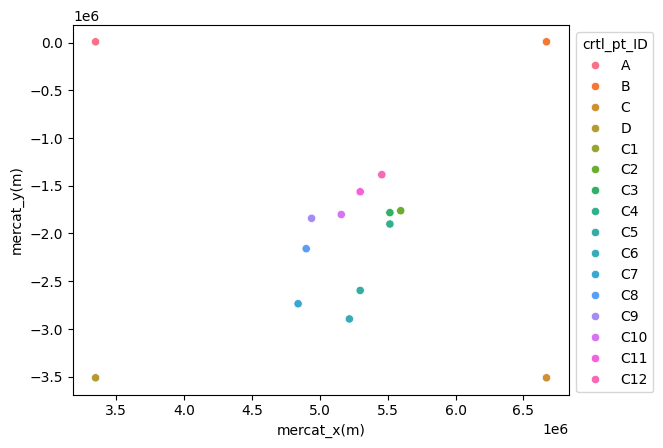

In [35]:
# Coastline points in Mercator Projection grid coordinates
import seaborn as sns

chart1=sns.scatterplot(data=points, x='mercat_x(m)',
                       y='mercat_y(m)',
                       hue='crtl_pt_ID')
sns.move_legend(chart1,'upper left', bbox_to_anchor=(1,1))

plt.show()

In [36]:
points['derived latitude (rads)'] = np.arctan(np.sinh(points['mercat_y(m)'] / R))
points['derived longitude (rads)']= (points['mercat_x(m)'])/R
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E),tan_lat,Easting_Mer(x_m),Northing_Mer(y_m),mercat_x(m),mercat_y(m),derived latitude (rads),derived longitude (rads)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599,1.00000,3.339513e+06,-7.081002e-10,3.348500e+06,8.479362e+03,0.001329,0.525008
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198,1.00000,6.679026e+06,-7.081002e-10,6.670039e+06,8.479362e+03,0.001329,1.045788
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198,0.57735,6.679026e+06,-3.503475e+06,6.670039e+06,-3.511954e+06,-0.524750,1.045788
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599,0.57735,3.339513e+06,-3.503475e+06,3.348500e+06,-3.511954e+06,-0.524750,0.525008
4,C1,NaN,NaN,525,233,NaN,NaN,NaN,NaN,NaN,NaN,5.456782e+06,-1.383782e+06,-0.215279,0.855563
5,C2,NaN,NaN,532,252,NaN,NaN,NaN,NaN,NaN,NaN,5.596008e+06,-1.761682e+06,-0.272766,0.877392
6,C3,NaN,NaN,528,253,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.781571e+06,-0.275768,0.864919
7,C4,NaN,NaN,528,259,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.900908e+06,-0.293725,0.864919
8,C5,NaN,NaN,517,294,NaN,NaN,NaN,NaN,NaN,NaN,5.297667e+06,-2.597039e+06,-0.396380,0.830616
9,C6,NaN,NaN,513,309,NaN,NaN,NaN,NaN,NaN,NaN,5.218109e+06,-2.895381e+06,-0.439130,0.818142


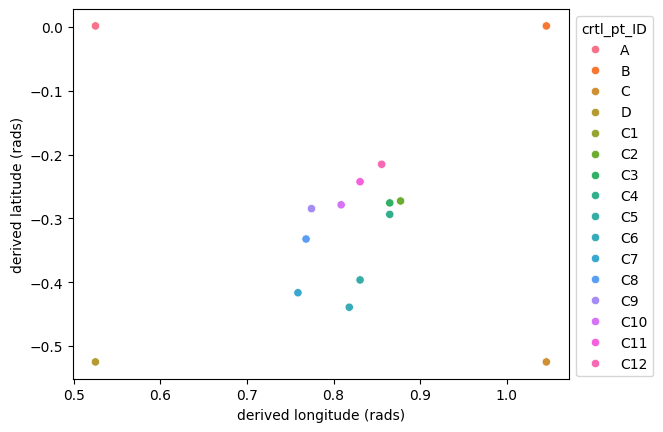

In [37]:
import seaborn as sns

chart1=sns.scatterplot(data=points, x='derived longitude (rads)',
                       y='derived latitude (rads)',
                       hue='crtl_pt_ID')
sns.move_legend(chart1,'upper left', bbox_to_anchor=(1,1))

plt.show()

In [38]:
points['derived latitude (deg)']=np.degrees(points['derived latitude (rads)'])
points['derived longitude (deg)']=np.degrees(points['derived longitude (rads)'])
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E),tan_lat,Easting_Mer(x_m),Northing_Mer(y_m),mercat_x(m),mercat_y(m),derived latitude (rads),derived longitude (rads),derived latitude (deg),derived longitude (deg)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599,1.00000,3.339513e+06,-7.081002e-10,3.348500e+06,8.479362e+03,0.001329,0.525008,0.076173,30.080734
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198,1.00000,6.679026e+06,-7.081002e-10,6.670039e+06,8.479362e+03,0.001329,1.045788,0.076173,59.919266
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198,0.57735,6.679026e+06,-3.503475e+06,6.670039e+06,-3.511954e+06,-0.524750,1.045788,-30.065946,59.919266
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599,0.57735,3.339513e+06,-3.503475e+06,3.348500e+06,-3.511954e+06,-0.524750,0.525008,-30.065946,30.080734
4,C1,NaN,NaN,525,233,NaN,NaN,NaN,NaN,NaN,NaN,5.456782e+06,-1.383782e+06,-0.215279,0.855563,-12.334602,49.020161
5,C2,NaN,NaN,532,252,NaN,NaN,NaN,NaN,NaN,NaN,5.596008e+06,-1.761682e+06,-0.272766,0.877392,-15.628320,50.270878
6,C3,NaN,NaN,528,253,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.781571e+06,-0.275768,0.864919,-15.800316,49.556183
7,C4,NaN,NaN,528,259,NaN,NaN,NaN,NaN,NaN,NaN,5.516451e+06,-1.900908e+06,-0.293725,0.864919,-16.829175,49.556183
8,C5,NaN,NaN,517,294,NaN,NaN,NaN,NaN,NaN,NaN,5.297667e+06,-2.597039e+06,-0.396380,0.830616,-22.710906,47.590771
9,C6,NaN,NaN,513,309,NaN,NaN,NaN,NaN,NaN,NaN,5.218109e+06,-2.895381e+06,-0.439130,0.818142,-25.160270,46.876075


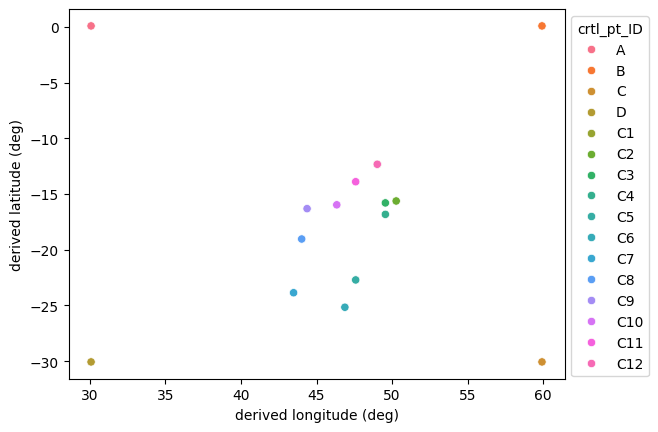

In [39]:
import seaborn as sns

chart1=sns.scatterplot(data=points, x='derived longitude (deg)',
                       y='derived latitude (deg)',
                       hue='crtl_pt_ID')
sns.move_legend(chart1,'upper left', bbox_to_anchor=(1,1))

plt.show()

In [40]:
# Lambert Projection Parameters
phi1 = np.radians(-10) 
phi2 = np.radians(-25)  
phi0 = np.radians(0)   
lambda0 = np.radians(0)

In [41]:
# Calculating Lambert projection Constants
n = np.log(np.cos(phi1) / np.cos(phi2)) / np.log(np.tan(np.pi / 4 + phi2 / 2) / np.tan(np.pi / 4 + phi1 / 2))
F = (np.cos(phi1) * np.tan(np.pi / 4 + phi1 / 2) ** n) / n
rho0 = R * F / (np.tan(np.pi / 4 + phi0 / 2) ** n)
print("n:", n)
print("F:", F)
rho0

n: -0.301570626498758
F: -3.443007923614173


np.float64(-21959504.536811195)

In [42]:
# Calculating Lambert projection coordinates
points['rho'] = R * F / (np.tan(np.pi / 4 + points['derived latitude (rads)'] / 2) ** n)
points['theta'] = n * (points['derived longitude (rads)'] - lambda0)
points['Easting_LCC(x_m)'] = points['rho'] * np.sin(points['theta'])
points['Northing_LCC(y_m)'] = rho0 - points['rho'] * np.cos(points['theta'])
points

,crtl_pt_ID,Lat_deg_N,Long_deg_E,pixel_x,pixel_y,radians_x,Lat(radians_N),Long(radians_E),tan_lat,Easting_Mer(x_m),...,mercat_x(m),mercat_y(m),derived latitude (rads),derived longitude (rads),derived latitude (deg),derived longitude (deg),rho,theta,Easting_LCC(x_m),Northing_LCC(y_m)
0,A,0.0,30.0,419,163,0.000000,0.000000,0.523599,1.00000,3.339513e+06,...,3.348500e+06,8.479362e+03,0.001329,0.525008,0.076173,30.080734,-2.196831e+07,-0.158327,3.463662e+06,-2.659638e+05
1,B,0.0,60.0,586,163,0.000000,0.000000,1.047198,1.00000,6.679026e+06,...,6.670039e+06,8.479362e+03,0.001329,1.045788,0.076173,59.919266,-2.196831e+07,-0.315379,6.814062e+06,-1.074696e+06
2,C,-30.0,60.0,586,340,-0.523599,-0.523599,1.047198,0.57735,6.679026e+06,...,6.670039e+06,-3.511954e+06,-0.524750,1.045788,-30.065946,59.919266,-1.859968e+07,-0.315379,5.769192e+06,-4.277179e+06
3,D,-30.0,30.0,419,340,-0.523599,-0.523599,0.523599,0.57735,3.339513e+06,...,3.348500e+06,-3.511954e+06,-0.524750,0.525008,-30.065946,30.080734,-1.859968e+07,-0.158327,2.932543e+06,-3.592458e+06
4,C1,NaN,NaN,525,233,NaN,NaN,NaN,NaN,NaN,...,5.456782e+06,-1.383782e+06,-0.215279,0.855563,-12.334602,49.020161,-2.056871e+07,-0.258013,5.248302e+06,-2.071645e+06
5,C2,NaN,NaN,532,252,NaN,NaN,NaN,NaN,NaN,...,5.596008e+06,-1.761682e+06,-0.272766,0.877392,-15.628320,50.270878,-2.020444e+07,-0.264596,5.283848e+06,-2.458210e+06
6,C3,NaN,NaN,528,253,NaN,NaN,NaN,NaN,NaN,...,5.516451e+06,-1.781571e+06,-0.275768,0.864919,-15.800316,49.556183,-2.018545e+07,-0.260834,5.205555e+06,-2.456822e+06
7,C4,NaN,NaN,528,259,NaN,NaN,NaN,NaN,NaN,...,5.516451e+06,-1.900908e+06,-0.293725,0.864919,-16.829175,49.556183,-2.007187e+07,-0.260834,5.176264e+06,-2.566557e+06
8,C5,NaN,NaN,517,294,NaN,NaN,NaN,NaN,NaN,...,5.297667e+06,-2.597039e+06,-0.396380,0.830616,-22.710906,47.590771,-1.942196e+07,-0.250489,4.814277e+06,-3.143679e+06
9,C6,NaN,NaN,513,309,NaN,NaN,NaN,NaN,NaN,...,5.218109e+06,-2.895381e+06,-0.439130,0.818142,-25.160270,46.876075,-1.914991e+07,-0.246728,4.677019e+06,-3.389516e+06


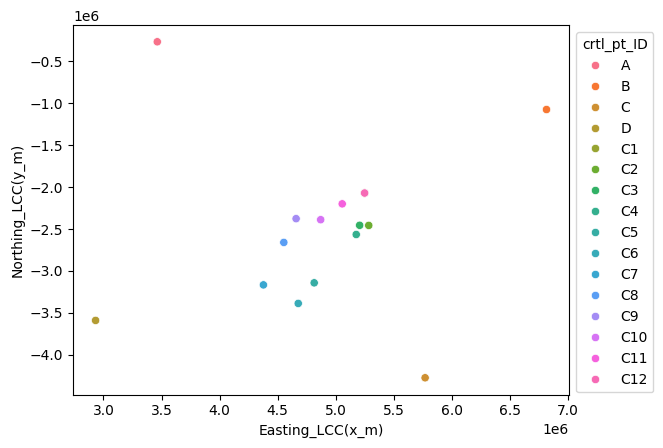

In [43]:
# Coastline points in Lambert Projection coordinates
import seaborn as sns

chart1=sns.scatterplot(data=points, x='Easting_LCC(x_m)',
                       y='Northing_LCC(y_m)',
                       hue='crtl_pt_ID')
sns.move_legend(chart1,'upper left', bbox_to_anchor=(1,1))

plt.show()

In [44]:
geodetic = points[['crtl_pt_ID','derived latitude (deg)','derived longitude (deg)']].iloc[[8,11,15]].copy()
geodetic

,crtl_pt_ID,derived latitude (deg),derived longitude (deg)
8,C5,-22.710906,47.590771
11,C8,-19.038910,44.017294
15,C12,-12.334602,49.020161


In [45]:
# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Extract coordinates
c12 = geodetic[geodetic["crtl_pt_ID"] == "C12"].iloc[0]
c8 = geodetic[geodetic["crtl_pt_ID"] == "C8"].iloc[0]
c5 = geodetic[geodetic["crtl_pt_ID"] == "C5"].iloc[0]

# Calculate distances
distance_c12_c8 = haversine(c12["derived latitude (deg)"], c12["derived longitude (deg)"],
                            c8["derived latitude (deg)"], c8["derived longitude (deg)"])
distance_c8_c5 = haversine(c8["derived latitude (deg)"], c8["derived longitude (deg)"],
                           c5["derived latitude (deg)"], c5["derived longitude (deg)"])

# Total flight path length
total_distance = distance_c12_c8 + distance_c8_c5
total_distance = distance_c12_c8 + distance_c8_c5

print("Geodetic Path Length:", total_distance)

Geodetic Path Length: 1471112.2958449502


In [46]:
# Compare Path Lengths for Mercator and Lambert
mercator_coords = points[['crtl_pt_ID','mercat_x(m)','mercat_y(m)']].iloc[[8,11,15]].copy()
mercator_coords

,crtl_pt_ID,mercat_x(m),mercat_y(m)
8,C5,5.297667e+06,-2.597039e+06
11,C8,4.899877e+06,-2.159471e+06
15,C12,5.456782e+06,-1.383782e+06


In [47]:
lambert_coords = points[['crtl_pt_ID','Easting_LCC(x_m)', 'Northing_LCC(y_m)']].iloc[[8,11,15]].copy()
lambert_coords

,crtl_pt_ID,Easting_LCC(x_m),Northing_LCC(y_m)
8,C5,4.814277e+06,-3.143679e+06
11,C8,4.552773e+06,-2.661294e+06
15,C12,5.248302e+06,-2.071645e+06


In [48]:
#Length forula
def compute_path_length(coords, x_col, y_col):
    path_length = 0
    for i in range(len(coords) - 1):
        x1, y1 = coords[x_col].iloc[i], coords[y_col].iloc[i]
        x2, y2 = coords[x_col].iloc[i + 1], coords[y_col].iloc[i + 1]
        path_length += np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return path_length

In [49]:
# Calculate the Mercator Projection path length
mercator_length = compute_path_length(mercator_coords, 'mercat_x(m)', 'mercat_y(m)')
print("Mercator Path Length:", mercator_length)


Mercator Path Length: 1546256.9122212771


In [50]:
# Calculate the Lambert Projection path length
lambert_length = compute_path_length(lambert_coords, 'Easting_LCC(x_m)', 'Northing_LCC(y_m)')
print("Lambert Path Length:", lambert_length)

Lambert Path Length: 1460544.3208825854


In [51]:
# Comparison path length
length_difference = mercator_length - lambert_length
print("Path Length Difference (Mercator - Lambert):", length_difference)

Path Length Difference (Mercator - Lambert): 85712.59133869177


In [52]:
data2 = points
df2 = pd.DataFrame(data2)
print(df2)
df2.to_csv('Correct_Data.csv', index=False)
print("Save as 'Correct_Data.csv'")

   crtl_pt_ID  Lat_deg_N  Long_deg_E  pixel_x  pixel_y  radians_x  \
0           A        0.0        30.0      419      163   0.000000   
1           B        0.0        60.0      586      163   0.000000   
2           C      -30.0        60.0      586      340  -0.523599   
3           D      -30.0        30.0      419      340  -0.523599   
4          C1        NaN         NaN      525      233        NaN   
5          C2        NaN         NaN      532      252        NaN   
6          C3        NaN         NaN      528      253        NaN   
7          C4        NaN         NaN      528      259        NaN   
8          C5        NaN         NaN      517      294        NaN   
9          C6        NaN         NaN      513      309        NaN   
10         C7        NaN         NaN      494      301        NaN   
11         C8        NaN         NaN      497      272        NaN   
12         C9        NaN         NaN      499      256        NaN   
13        C10        NaN         N

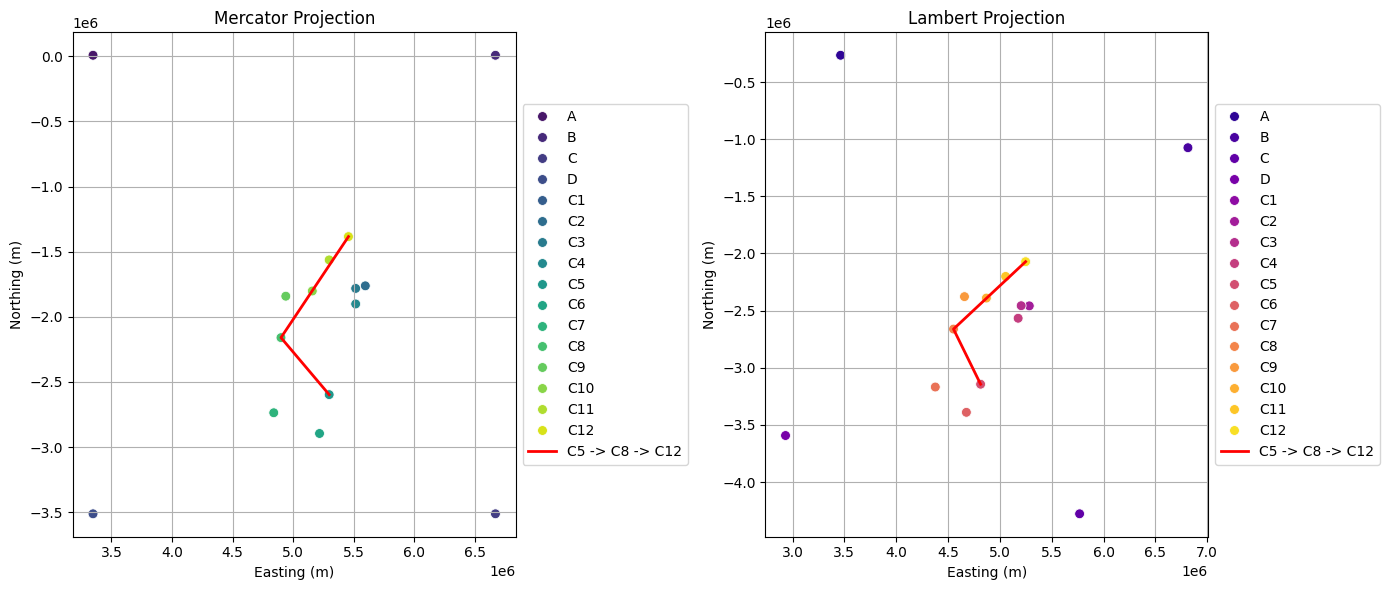

In [53]:
plt.figure(figsize=(14, 6))

# The Mercateor Projection Map
plt.subplot(1, 2, 1)
sns.scatterplot(data=points, x='mercat_x(m)', y='mercat_y(m)', hue='crtl_pt_ID', palette="viridis", s=50)

# Link in red C5 -> C8 -> C12
c5 = points[points['crtl_pt_ID'] == 'C5'].iloc[0]
c8 = points[points['crtl_pt_ID'] == 'C8'].iloc[0]
c12 = points[points['crtl_pt_ID'] == 'C12'].iloc[0]
plt.plot([c5['mercat_x(m)'], c8['mercat_x(m)'], c12['mercat_x(m)']],
         [c5['mercat_y(m)'], c8['mercat_y(m)'], c12['mercat_y(m)']],
         color='red', linestyle='-', linewidth=2, label='C5 -> C8 -> C12')

plt.title("Mercator Projection")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

# The Lambert Projection Map
plt.subplot(1, 2, 2)
sns.scatterplot(data=points, x='Easting_LCC(x_m)', y='Northing_LCC(y_m)', hue='crtl_pt_ID', palette="plasma", s=50)

# Link in red C5 -> C8 -> C12
plt.plot([c5['Easting_LCC(x_m)'], c8['Easting_LCC(x_m)'], c12['Easting_LCC(x_m)']],
         [c5['Northing_LCC(y_m)'], c8['Northing_LCC(y_m)'], c12['Northing_LCC(y_m)']],
         color='red', linestyle='-', linewidth=2, label='C5 -> C8 -> C12')

plt.title("Lambert Projection")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.tight_layout()
plt.show()